In [255]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('data/Battery_RUL.csv')
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [256]:
### No null data in the dataset.
### statistics of variables show outliers. (Are these outlier explaining particular behavior or are they anomalies.)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


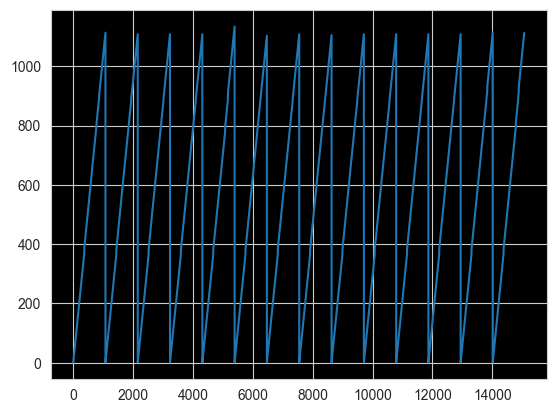

1134.0


14

In [257]:
##Lets start to plot cycle time and see how this actually looks. 
plt.plot(df['Cycle_Index'])
plt.show()

#Extracting 14 time series corresponding to each battery from given data frame
print(df['Cycle_Index'].max())
# To extract individual battery data we will be slicing the data frame by looping over it. 
# Collect all index with zero Cycle_index. 
import numpy as np
l=df[df['Cycle_Index']==1].index
df['battery id']=np.nan
l
df_list=[]
c=1
for i in range(0,len(l)):
    if i != len(l)-1:
        df_list.append(df.iloc[l[i]:l[i+1]])
        df.loc[l[i]:l[i+1],'battery id']=c
        c=c+1
    else:
        df_list.append(df.iloc[l[i]:])
        df.loc[l[i]:,'battery id']=c
        c=14
len(df_list)

In [269]:
for i in range(0,13):
    print(df_list[i]['Min. Voltage Charg. (V)'].max(),df_list[i]['Min. Voltage Charg. (V)'].min())
    print(df_list[i]['Max. Voltage Dischar. (V)'].max(),df_list[i]['Max. Voltage Dischar. (V)'].min())
    print(df_list[i]['Discharge Time (s)'].max(),df_list[i]['Discharge Time (s)'].min())
    print("")

df_list[i]

4.053 3.086
4.29 3.67
679307.97 168.0

3.991 3.103
4.288 3.666
688111.95 814.81

4.05 3.13
4.289 3.666
655539.5 929.5

4.073 3.136
4.288 3.667
949261.22 336.0

4.379 3.123
4.286 3.066
682287.6 12.0

4.227 3.119
4.282 3.65
684375.81 780.0

3.992 3.12
4.288 3.078
958320.37 17.57

4.191 3.103
4.288 3.667
948083.85 936.0

4.242 3.127
4.288 3.664
679620.12 720.0

4.222 3.119
4.284 3.661
681626.1 876.0

4.257 3.119
4.287 3.109
671096.3 30.79

4.186 3.126
4.283 3.043
667352.36 8.69

4.129 3.117
4.284 3.122
951165.67 32.56



,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery id
12941,1.0,2590.02,1274.016000,3.657,3.230,5355.008,6664.00,10864.00,1113,13.0
12942,2.0,7378.01,1326.511500,4.232,3.234,5411.008,6671.01,10576.99,1112,13.0
12943,3.0,7356.99,1246.016000,4.235,3.239,5404.000,6656.99,10479.01,1111,13.0
12944,4.0,7343.01,1215.679000,4.236,3.240,5404.004,6657.00,10409.00,1110,13.0
12945,6.0,64978.47,1221.488000,4.284,3.246,5397.024,107732.31,107732.31,1108,13.0
...,...,...,...,...,...,...,...,...,...,...
14008,1110.0,906.56,233.666667,3.791,3.698,1227.812,1808.31,7488.06,4,13.0
14009,1111.0,905.38,233.666667,3.791,3.698,1223.375,1808.38,7451.12,3,13.0
14010,1112.0,34.38,38.709677,3.130,3.641,108.250,8.00,8.38,2,13.0
14011,1113.0,908.12,226.100000,3.782,3.806,966.313,1673.06,8639.06,1,13.0


In [259]:

import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="Cycle_Index", y="Max. Voltage Dischar. (V)", color='battery id')
fig.show()


plt.show()

In [260]:
import plotly.express as px

#df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="Cycle_Index", y="Min. Voltage Charg. (V)", color='battery id')
fig.show()


plt.show()

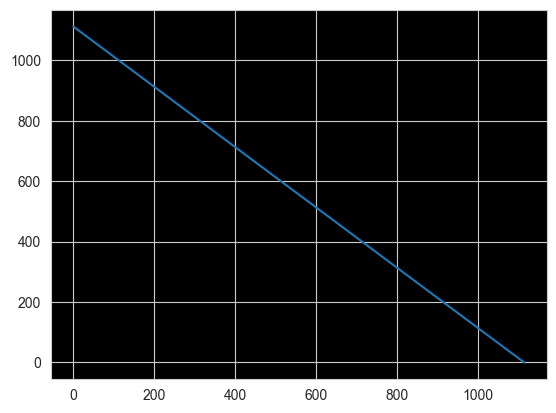

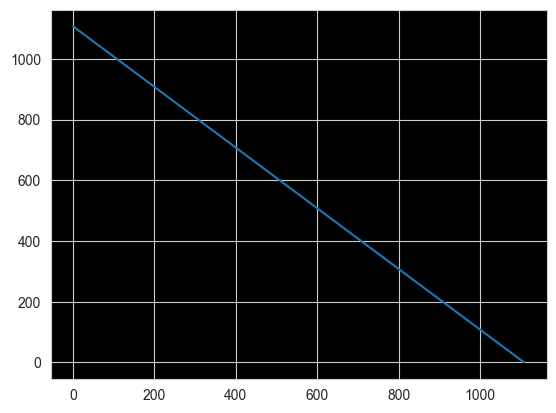

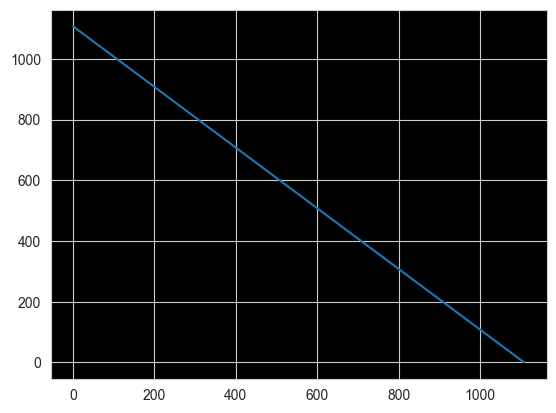

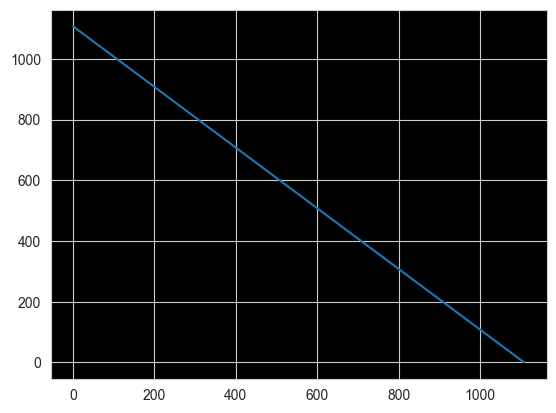

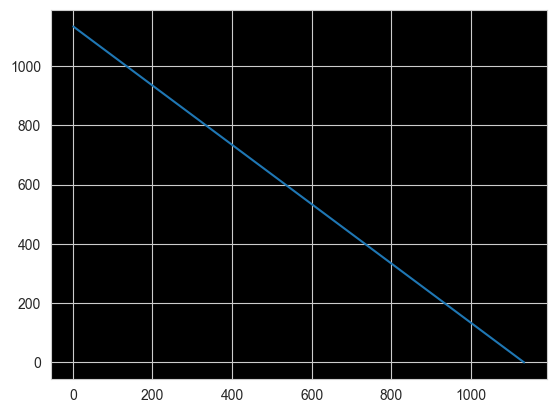

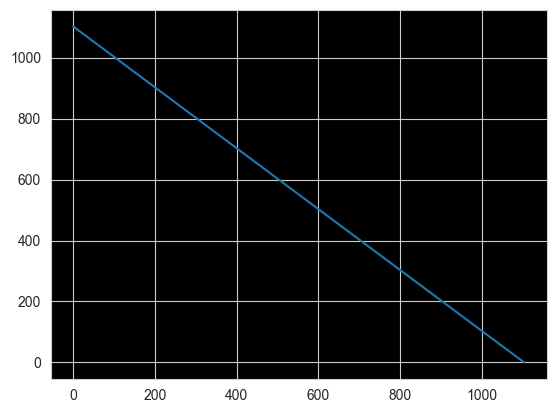

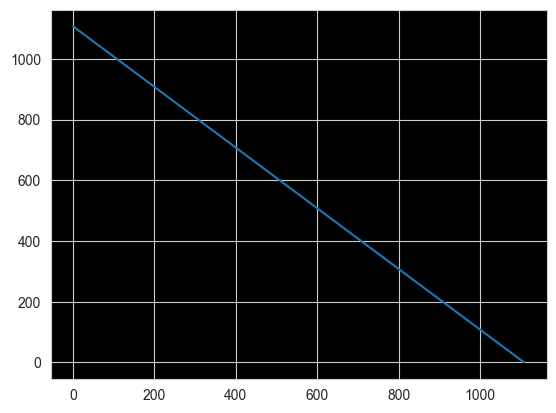

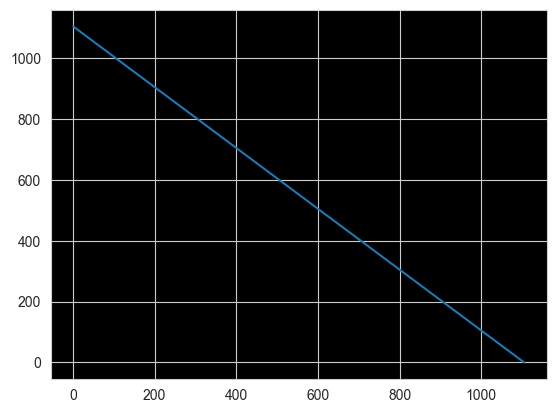

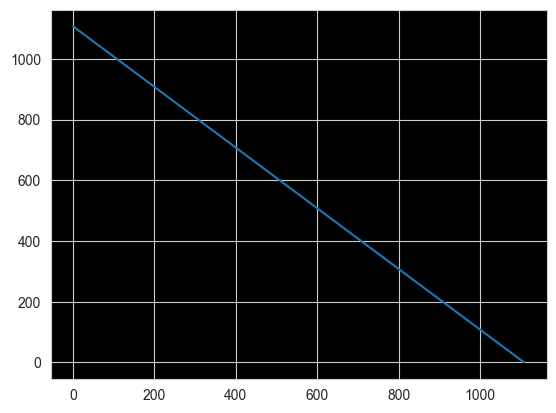

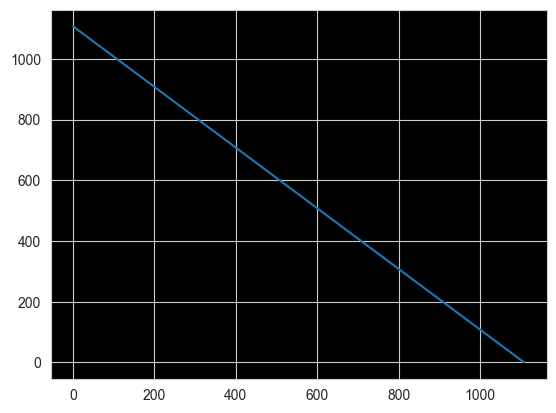

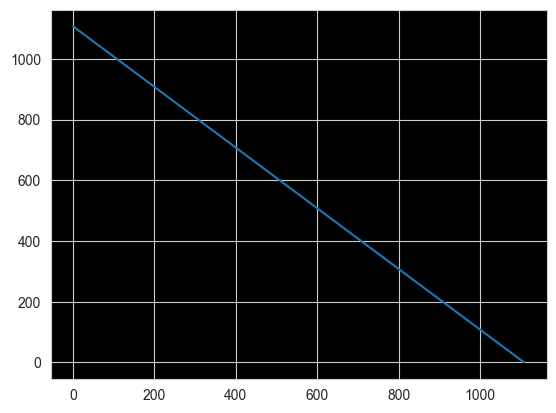

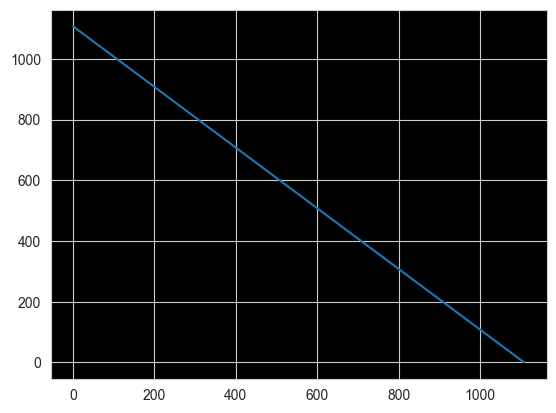

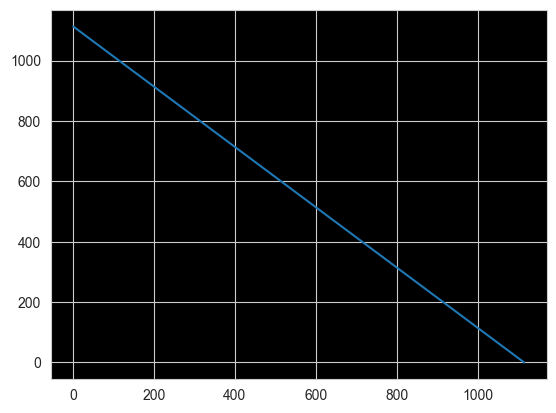

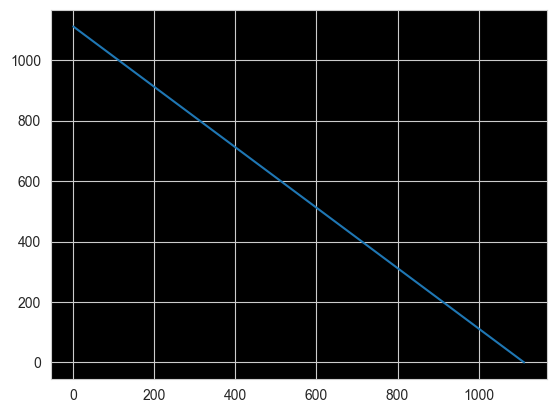

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery id
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,1.0
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1.0
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,1.0
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,1.0
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,1.0
...,...,...,...,...,...,...,...,...,...,...
1071,1109.0,928.00,247.178571,3.810,3.709,1232.250,1844.25,7071.31,4,1.0
1072,1110.0,925.25,246.000000,3.808,3.707,1232.250,1844.25,6985.12,3,1.0
1073,1111.0,920.25,243.750000,3.807,3.708,1227.875,1844.38,6994.44,2,1.0
1074,1112.0,906.94,233.969000,3.795,3.825,854.375,1582.00,7776.75,1,1.0


In [261]:
##Now we have around 14 dataframe. Let see we capture everything okay by plotting them.
for i in range(14):
    plt.plot(df_list[i]['Cycle_Index'],df_list[i]['RUL'])
    plt.show()
df_list[0]
# So seems like everything is fine with these 14 cycle time extraction.

# Now lets see further. Lets pick up on of these cycles to see how the relationship between each variuable is 

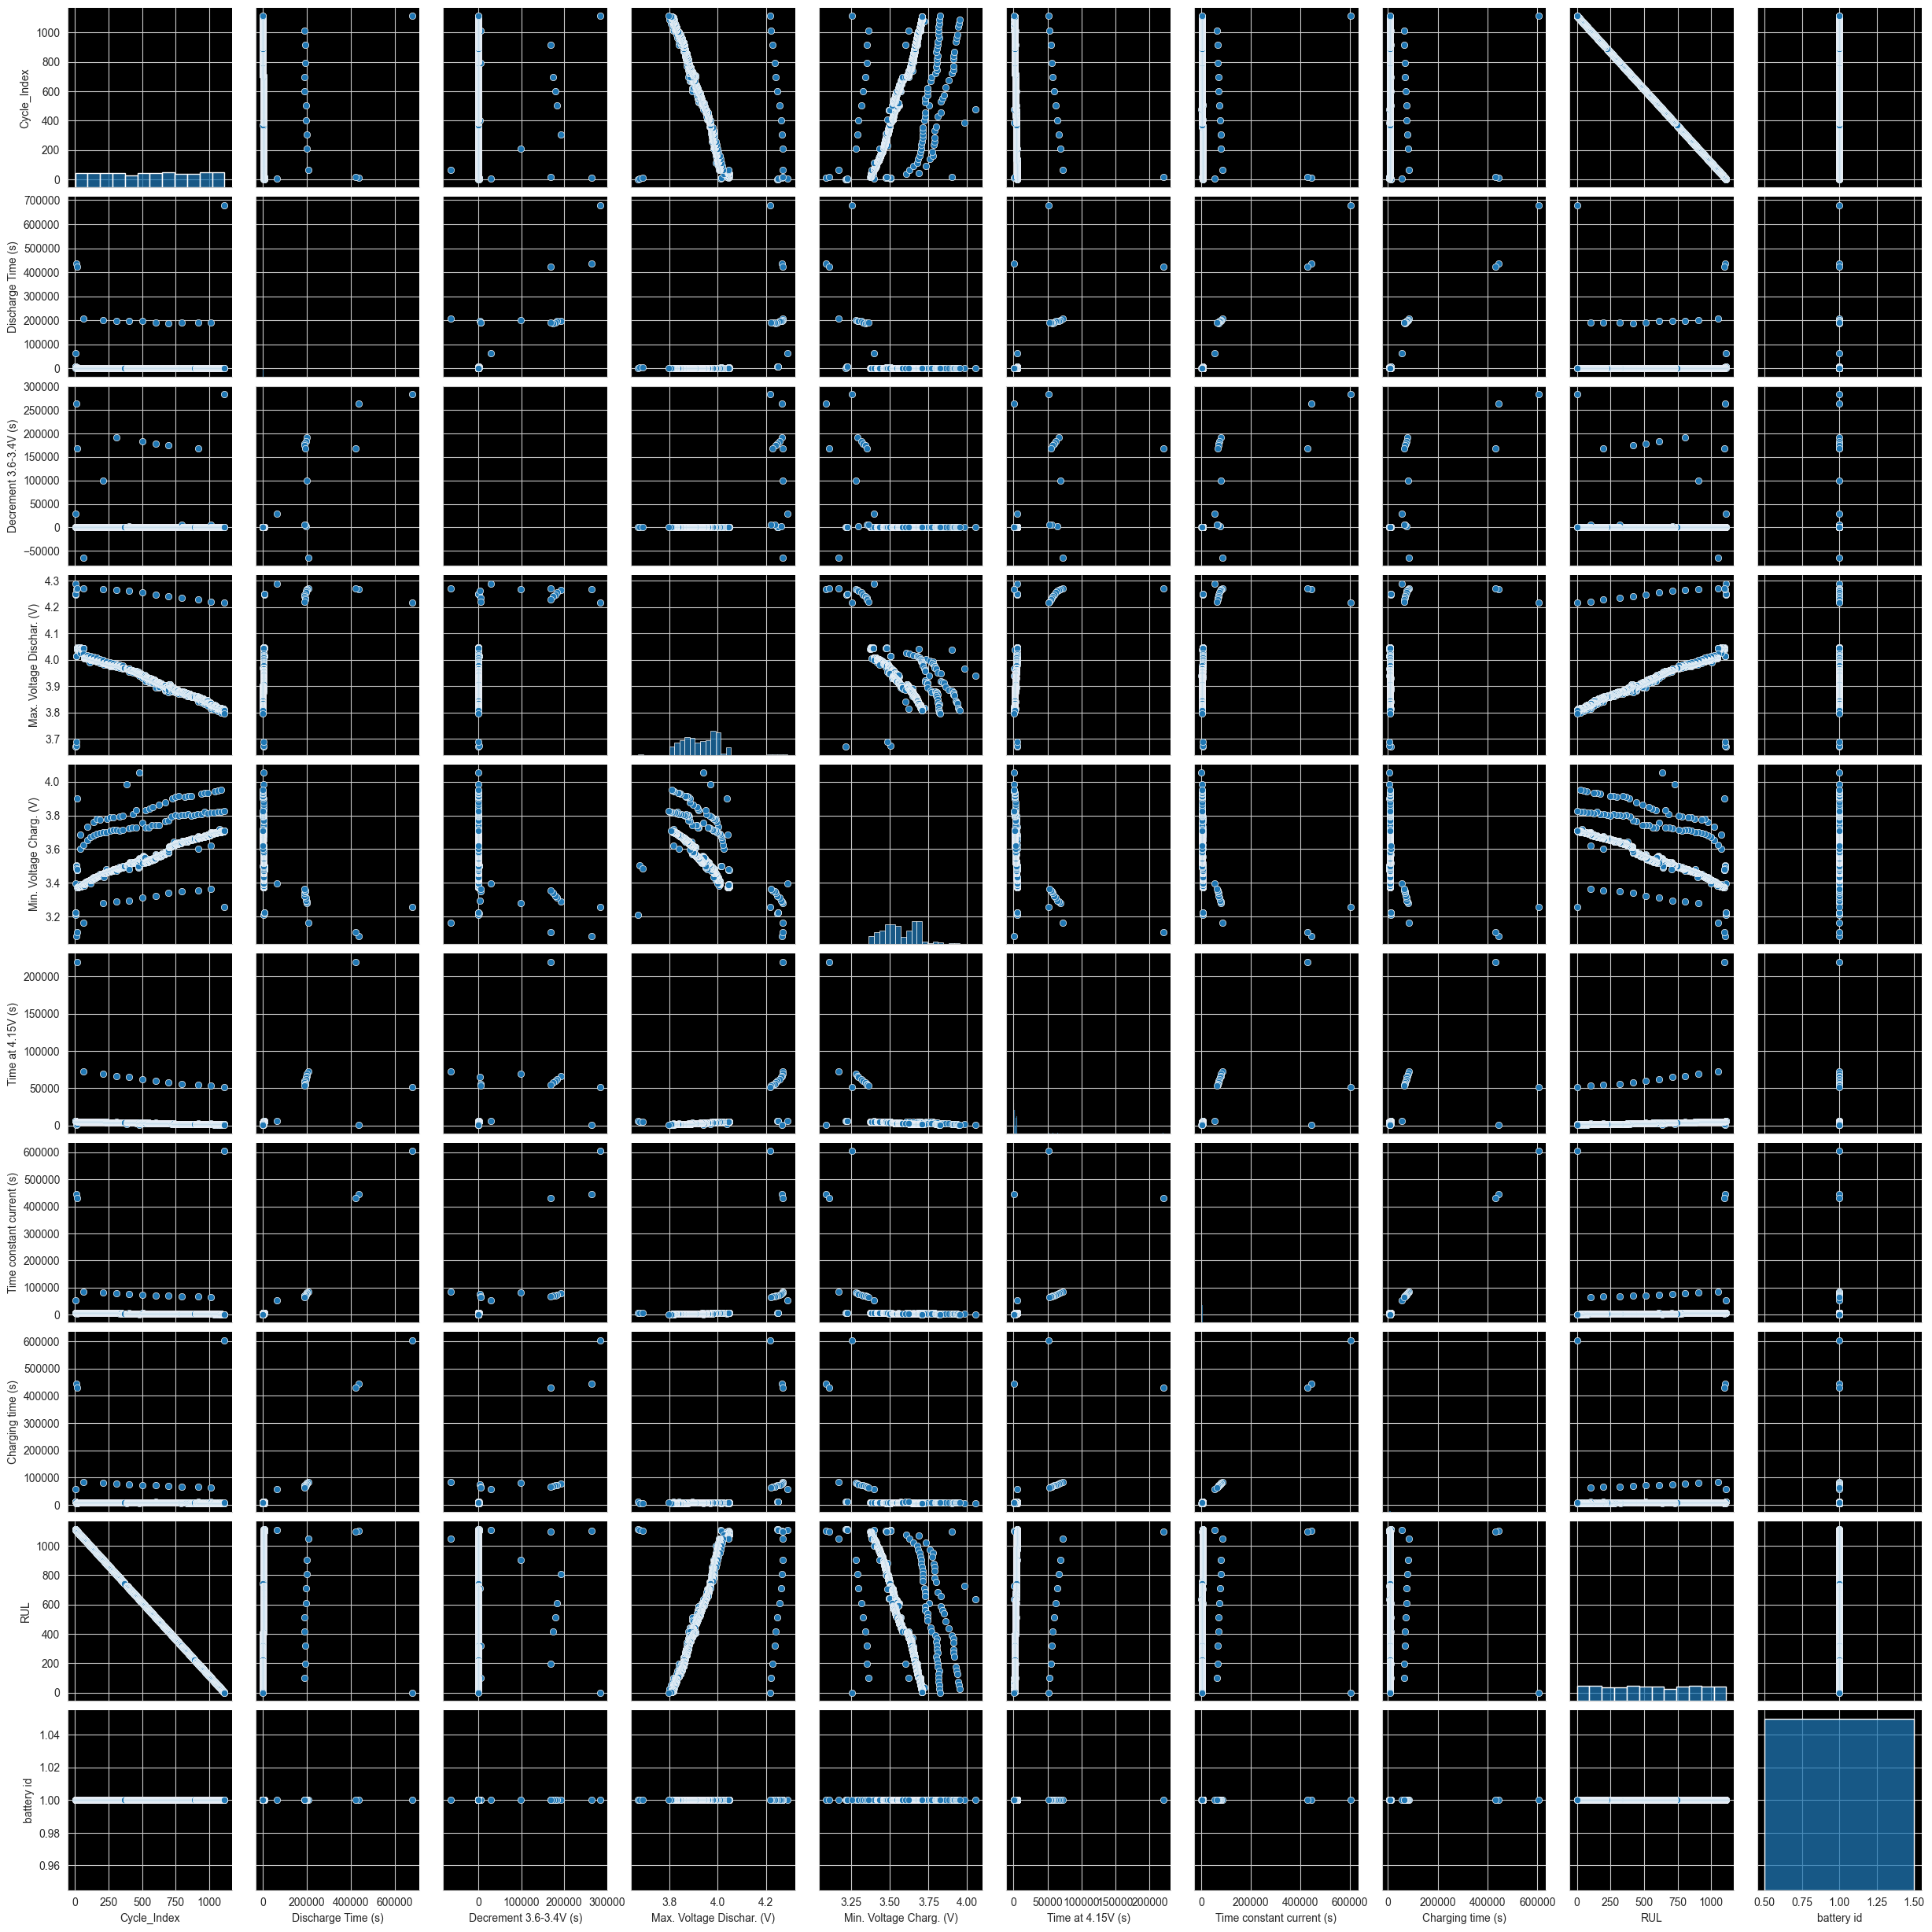

In [262]:
#pairwise plot to see the relationship between variables. Just looking at the plotwise pair we see not much info that we 
#can get regarding them. Seems outliers are affecting the data
import seaborn as sns
sns.pairplot(df_list[0])
plt.show()
#Lets see how these variables inetract with each other using pairwise plot.

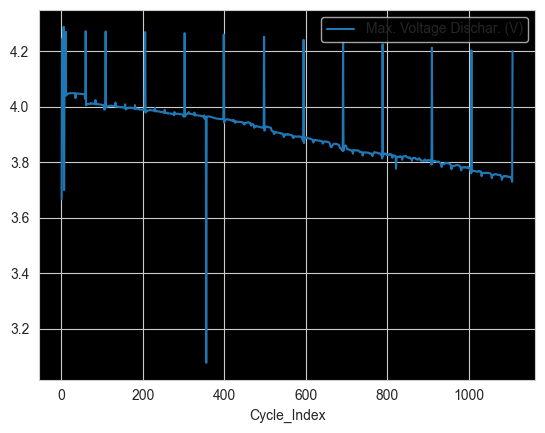

In [263]:
df_list[6].set_index('Cycle_Index')[['Max. Voltage Dischar. (V)']].plot()
plt.show()


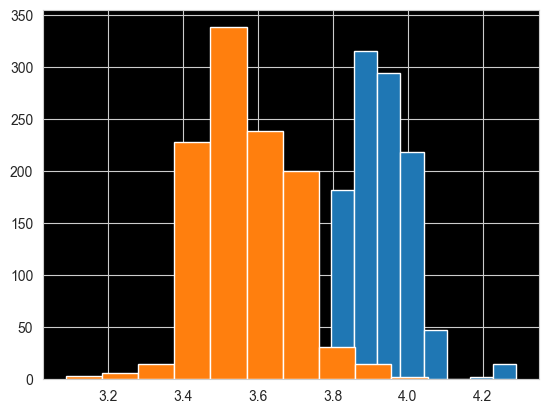

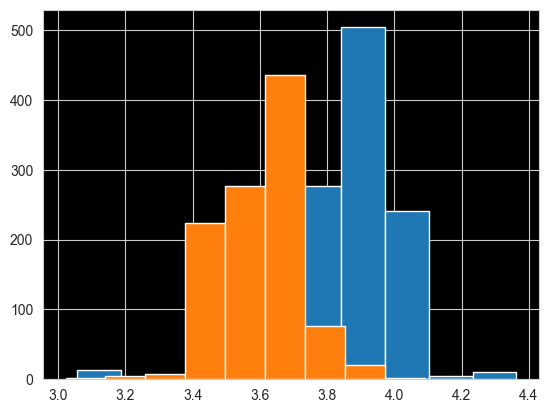

In [264]:
for i in (0,13):
    df_list[i]['Max. Voltage Dischar. (V)'].hist()
    df_list[i]['Min. Voltage Charg. (V)'].hist()

    plt.show()

In [265]:
df_list[0].describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery id
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.0
mean,556.878253,4899.191143,2062.104331,3.929328,3.566317,3863.478884,5972.033439,10089.222221,556.121747,1.0
std,323.594005,33317.514216,18051.024850,0.077341,0.121406,8892.439128,27000.077287,26671.212644,323.594005,0.0
min,1.000000,168.000000,-64192.716000,3.670000,3.086000,269.984000,1124.350000,5277.630000,0.000000,1.0
25%,271.750000,1195.347500,332.000000,3.869000,3.478000,1864.884179,2636.337500,7473.617500,276.750000,1.0
50%,559.500000,1617.405000,474.000000,3.928000,3.554000,3133.732000,4004.420000,8197.250000,553.500000,1.0
75%,836.250000,1934.392500,628.200000,3.982000,3.661000,4166.264000,5084.350000,8590.460000,841.250000,1.0
max,1113.000000,679307.970000,283252.125000,4.290000,4.053000,219923.996000,604521.090000,604521.090000,1112.000000,1.0


We see that the mean discharge and mean charge time are different than each other.
Seems like if we assume that time it takes to charge is greater than the discharge time. 

Almost 75 percent of data lies in noraml range but then we see these very high value of charge and discharge .
What could explain this abrupt behavor.lets see how the histogram looks for these.


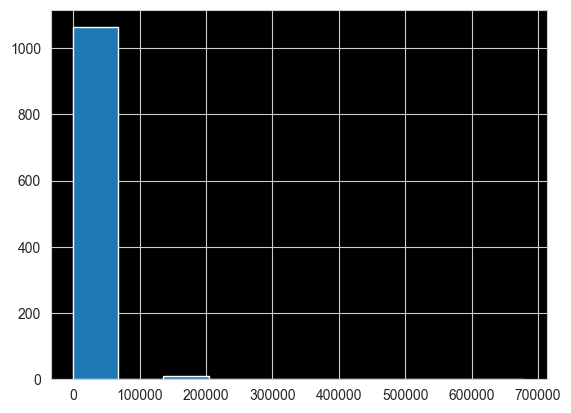

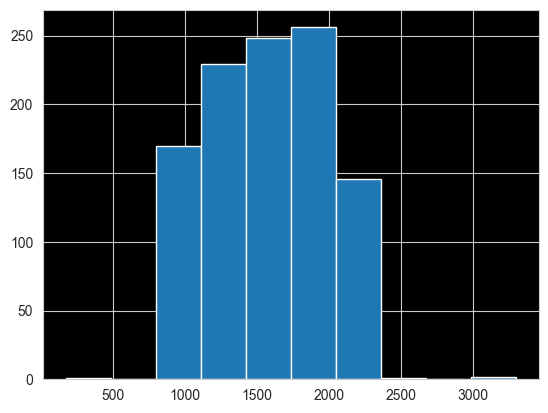

In [266]:
df_list[0]['Discharge Time (s)'].hist()
plt.show() 
###okay so we see that the discharge time or any other time is affected by the outlier. Remove this value and again plot histogram.
df_list[0][df_list[0]['Discharge Time (s)']<5000]['Discharge Time (s)'].hist()
plt.show()

In [267]:
###Lets figure out where these abnormal events are occuring
### for a single data set 23 rows shows this behavior
i=1
df_list[i][df_list[i]['Discharge Time (s)']>5000]


#as the cycle time starts we have higher charging and discharging time. Can this observation be used to booast model. 
# as of now we will leave this out

## Negative time doesnt make sense remove it. 
##

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,battery id
1077,2.0,7384.99,1228.496000,4.242,3.221,5488.000000,6727.01,10492.99,1106,2.0
1078,3.0,7364.00,1165.519000,4.244,3.225,5480.989000,6720.00,10367.01,1105,2.0
1079,4.0,7356.99,1141.027000,4.246,3.227,5481.027000,6720.00,10311.01,1104,2.0
1080,6.0,64974.56,1143.328667,4.288,3.389,5460.000000,53233.86,56789.86,1102,2.0
1082,8.0,6026.40,1190.364190,4.024,3.489,5040.000000,5974.37,5974.37,1100,2.0
1083,9.0,6030.05,1193.577905,4.026,3.491,5024.997333,5955.68,5955.68,1099,2.0
1084,10.0,6007.93,1209.319356,4.024,3.495,5009.994667,5940.23,5940.23,1098,2.0
1085,11.0,425336.62,250805.437000,4.267,3.103,221138.769000,87344.19,432558.17,1097,2.0
1134,60.0,206327.42,203610.371000,4.269,3.179,70799.998000,82120.83,82120.83,1048,2.0
1180,106.0,8541.94,-5817.313000,3.961,3.456,4616.313000,12006.44,15479.25,1002,2.0


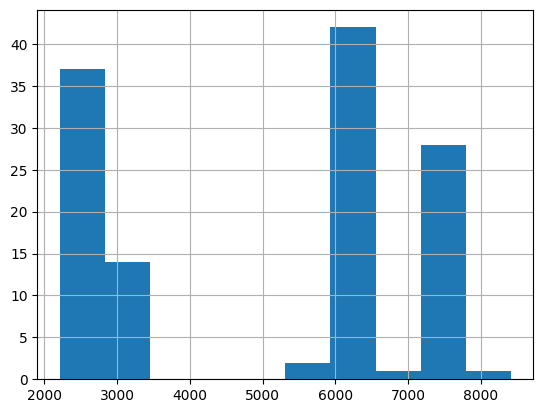

In [ ]:
df[(df['Cycle_Index']>2) &(df['Cycle_Index']<15) & (df['Discharge Time (s)']<18000)]['Discharge Time (s)'].hist()
plt.show()

In [ ]:
## lETs see how the end of data looks like.
df_list[0].tail(50)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
1026,1064.0,960.22,259.400000,3.813,3.703,1304.344000,1916.34,7230.12,49
1027,1065.0,963.19,260.000000,3.816,3.703,1308.813000,1916.31,7158.16,48
1028,1066.0,964.62,261.828571,3.816,3.703,1317.875000,1952.38,7128.50,47
1029,1067.0,967.25,261.828571,3.817,3.702,1322.375000,1952.38,7103.31,46
1030,1068.0,963.44,261.214286,3.816,3.701,1326.813000,1952.31,7103.44,45
1031,1069.0,960.50,260.000000,3.816,3.701,1317.875000,1952.38,7069.69,44
1032,1070.0,962.56,261.214286,3.816,3.702,1309.454857,1916.31,7078.06,43
1033,1071.0,962.88,260.114286,3.817,3.702,1313.375000,1952.38,7087.38,42
1034,1072.0,961.88,260.114286,3.817,3.702,1313.375000,1952.38,7019.19,41
1035,1073.0,962.00,259.714286,3.817,3.701,1313.313000,1916.31,7034.12,40


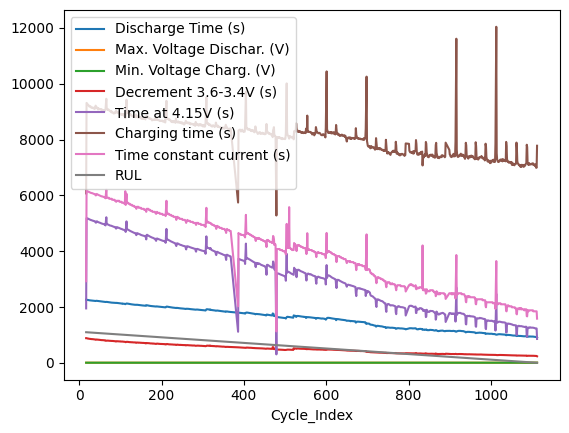

In [ ]:
df_list[0][(df_list[0]['Discharge Time (s)']<2500) & (df_list[0]['Discharge Time (s)']>500)].set_index('Cycle_Index')[['Discharge Time (s)',
                                                                                                                       'Max. Voltage Dischar. (V)',
                                                                                                                       'Min. Voltage Charg. (V)',
                                                                                                                       'Decrement 3.6-3.4V (s)'
                                                                                                                       ,'Time at 4.15V (s)',
                                                                                                                       'Charging time (s)',
                                                                                                                       'Time constant current (s)',
                                                                                                                       'RUL']].plot()
plt.show()

In [ ]:
df=df[df>0].dropna()#.describe()

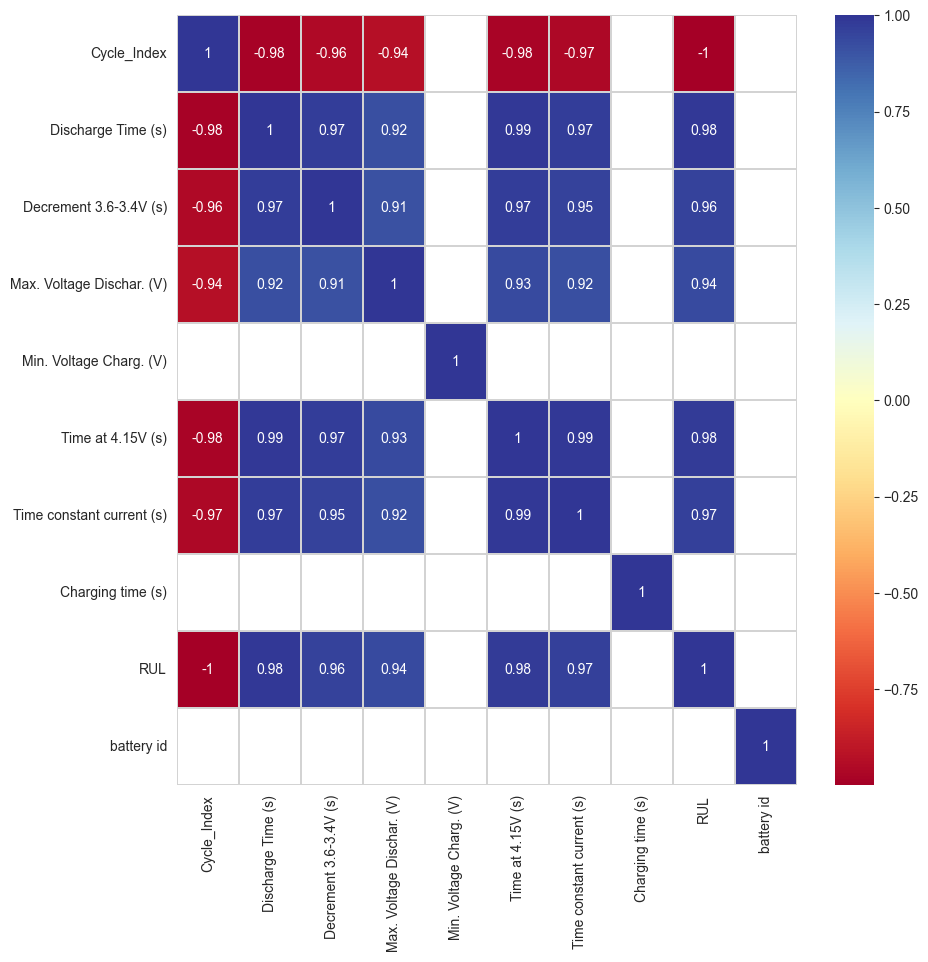

In [ ]:
i=4
t=df[(df['Discharge Time (s)']<5000) & (df['Discharge Time (s)']>500)]#.set_index('Cycle_Index')
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = t.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')
plt.show()

## Take discharge time or Max. Voltage Dischar. (V) for this data frame

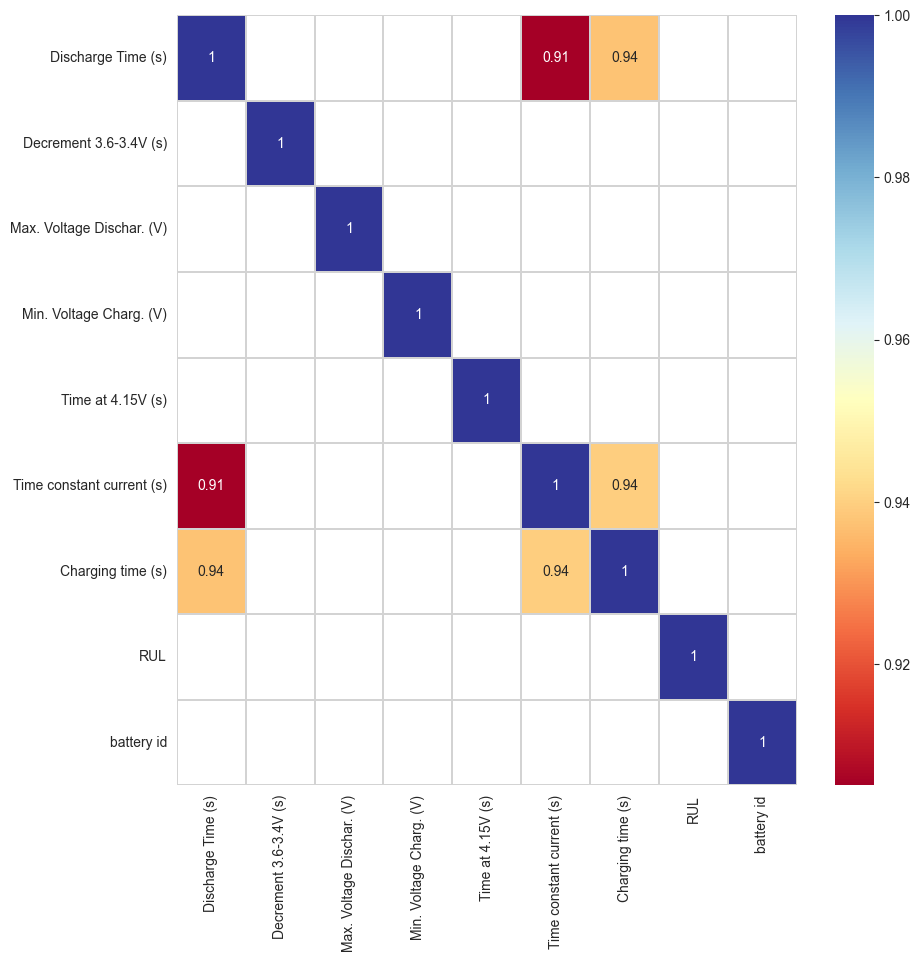

In [ ]:
#now look at the correlation where the values seems like outliers.
# If they are not an anomaly they should atleast maintain there relationship between each other
t=df[(df['Discharge Time (s)']>5000)].set_index('Cycle_Index')
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = t.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')
plt.show()
# Only some of the variables seems to be exhibiting the relationship 

So lets train the model on our data with a single variable and then try to make prediction on remaining data. Here we are seeing 
23/1076 2 percent of data that might lead to error becuase of the correlation between variables changing for data, 
example for battery 1 we may assume that there will be a min of 2 percent error. 

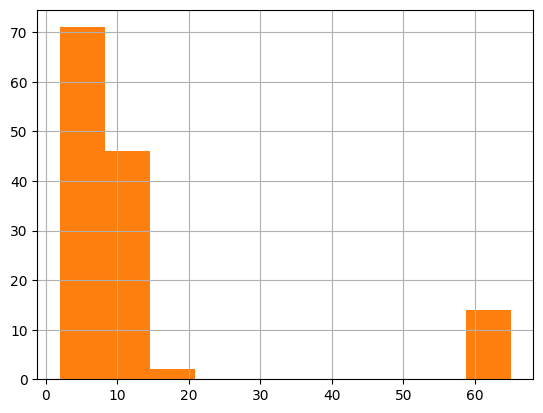

In [ ]:
df[(df['Discharge Time (s)']>5000)]
#281 observations
df[(df['Discharge Time (s)']>5000) & (df['Cycle_Index']<100)]['Cycle_Index'].hist()
#133 observations less than 100 and 80 around below 10.
plt.show()

Model Training. Even though there is a linear relationship (strong) between some of the variables the model does not work well over all batteries. Even high correlation between variables restrict us to use other variables. We saw while experimentation that the model works well when are Tree based.

We will start by selecting a battery as a hold out test set and 13 to build up model.

Mean Absolute Error      :  17.927916897883208
Mean Squared  Error      :  1083.143725536512
Root Mean Squared  Error :  32.911148954974394
Accuracy on Training set   :  0.9997572418597075
Accuracy on Testing set  :  0.98925280931242
Mean Absolute Error      :  44.1838626482146
Mean Squared  Error      :  5785.868903371429
Root Mean Squared  Error :  76.06489928588238
Accuracy on Testing set  :  0.9445252488298457


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



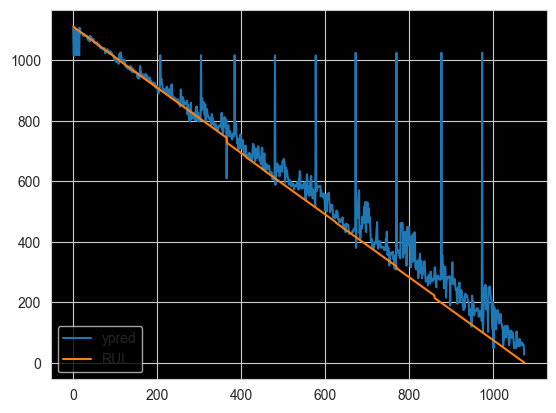


Mean Absolute Error      :  18.530945082331016
Mean Squared  Error      :  1090.3262193913195
Root Mean Squared  Error :  33.0200881190726
Accuracy on Training set   :  0.9997747971324367
Accuracy on Testing set  :  0.9893555371800907
Mean Absolute Error      :  67.56681614002478
Mean Squared  Error      :  9056.944146339969
Root Mean Squared  Error :  95.16797857651474
Accuracy on Testing set  :  0.9123411708141476


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



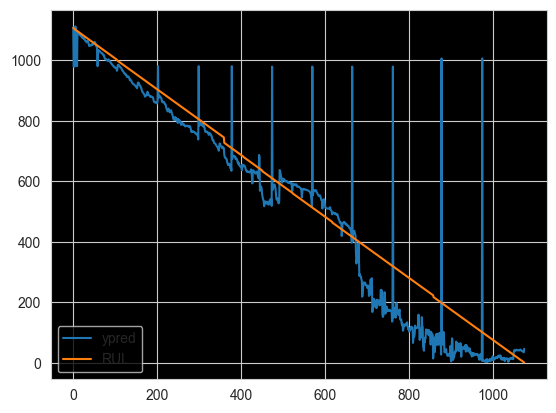


Mean Absolute Error      :  17.91787047221486
Mean Squared  Error      :  1030.0688558492889
Root Mean Squared  Error :  32.0946857882935
Accuracy on Training set   :  0.9997786162251753
Accuracy on Testing set  :  0.9899425379669246
Mean Absolute Error      :  56.765110490378646
Mean Squared  Error      :  8104.622763487987
Root Mean Squared  Error :  90.02567835616674
Accuracy on Testing set  :  0.9216711711608674


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



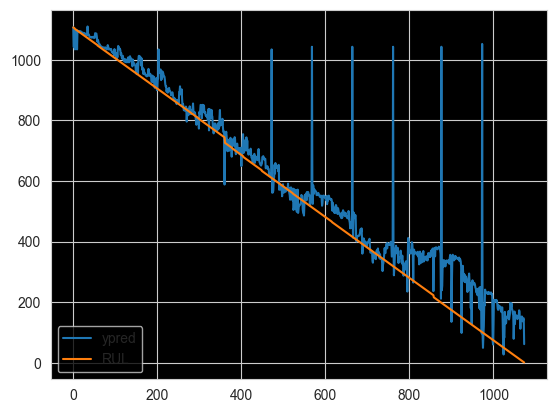


Mean Absolute Error      :  19.97737464608602
Mean Squared  Error      :  1321.264514472485
Root Mean Squared  Error :  36.34920239114587
Accuracy on Training set   :  0.9997701856171868
Accuracy on Testing set  :  0.9872307153194293
Mean Absolute Error      :  33.92105331374974
Mean Squared  Error      :  4201.384031038268
Root Mean Squared  Error :  64.81808413582021
Accuracy on Testing set  :  0.9593450891139751


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



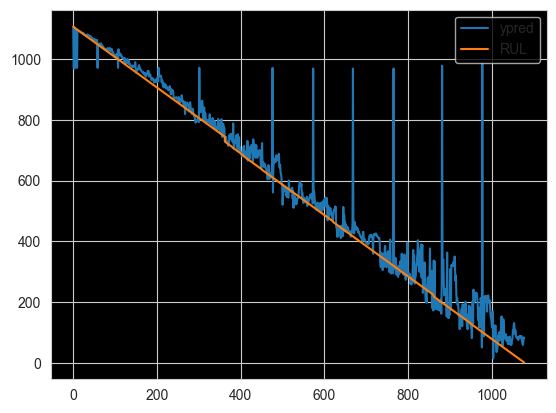


Mean Absolute Error      :  19.32244907928521
Mean Squared  Error      :  1177.0014721177968
Root Mean Squared  Error :  34.30745505160353
Accuracy on Training set   :  0.9998275334295327
Accuracy on Testing set  :  0.9887988788476406
Mean Absolute Error      :  42.703264276846674
Mean Squared  Error      :  5241.399687216143
Root Mean Squared  Error :  72.39751160928215
Accuracy on Testing set  :  0.9517560714388432


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



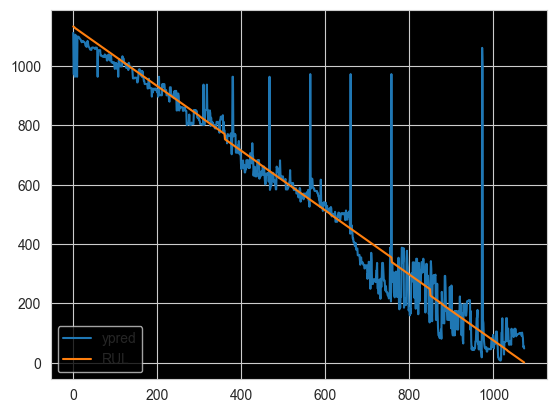


Mean Absolute Error      :  18.899259539901298
Mean Squared  Error      :  1169.0004212333183
Root Mean Squared  Error :  34.19064815462436
Accuracy on Training set   :  0.9997746438562997
Accuracy on Testing set  :  0.9884844538508047
Mean Absolute Error      :  43.172387617865276
Mean Squared  Error      :  5748.258130985065
Root Mean Squared  Error :  75.8172680263874
Accuracy on Testing set  :  0.9438918970412715


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



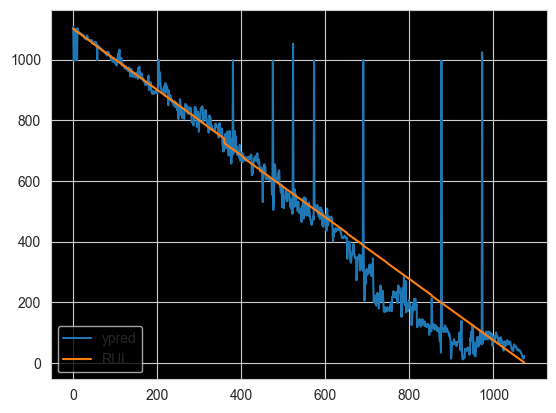


Mean Absolute Error      :  18.23266134428415
Mean Squared  Error      :  1064.0919714512124
Root Mean Squared  Error :  32.62042261300752
Accuracy on Training set   :  0.9997801437931095
Accuracy on Testing set  :  0.9897088438632194
Mean Absolute Error      :  49.770530651087604
Mean Squared  Error      :  7095.514270983371
Root Mean Squared  Error :  84.23487562158189
Accuracy on Testing set  :  0.931270139259365


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



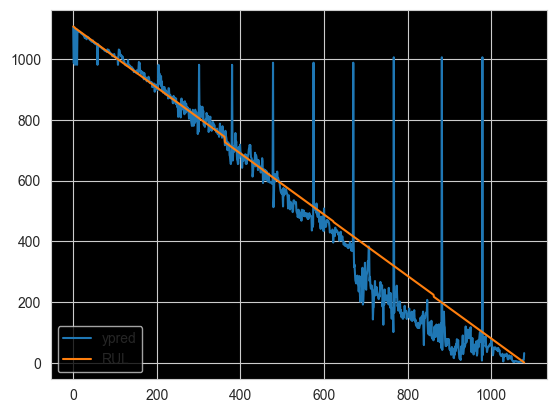


Mean Absolute Error      :  19.106147878198897
Mean Squared  Error      :  1205.8547934783858
Root Mean Squared  Error :  34.72541998994952
Accuracy on Training set   :  0.9999193922600909
Accuracy on Testing set  :  0.9881260722155734
Mean Absolute Error      :  39.91643247558643
Mean Squared  Error      :  6717.258395507122
Root Mean Squared  Error :  81.95888234662014
Accuracy on Testing set  :  0.9345270591118874


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



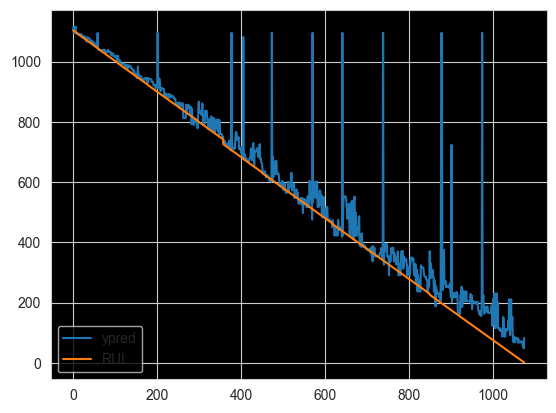


Mean Absolute Error      :  18.138324264616177
Mean Squared  Error      :  1143.1147584780672
Root Mean Squared  Error :  33.80998016086474
Accuracy on Training set   :  0.9997676135347987
Accuracy on Testing set  :  0.9888286961922986
Mean Absolute Error      :  38.90377878183832
Mean Squared  Error      :  4616.883965379277
Root Mean Squared  Error :  67.94765606979594
Accuracy on Testing set  :  0.955360045778433


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



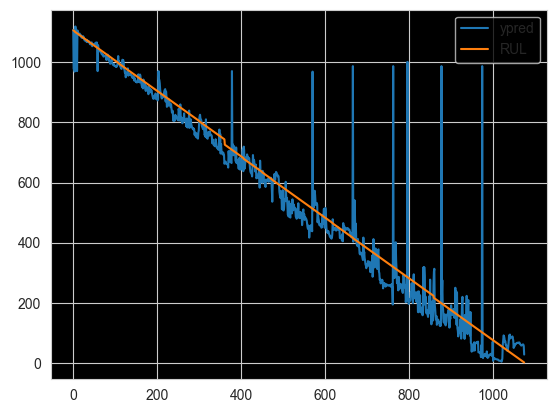


Mean Absolute Error      :  19.947350270720534
Mean Squared  Error      :  1281.6413303805639
Root Mean Squared  Error :  35.80001858072931
Accuracy on Training set   :  0.9999110039881036
Accuracy on Testing set  :  0.9875987531689168
Mean Absolute Error      :  38.29679661316708
Mean Squared  Error      :  3843.5302219832915
Root Mean Squared  Error :  61.9962113518503
Accuracy on Testing set  :  0.9628204386638892


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



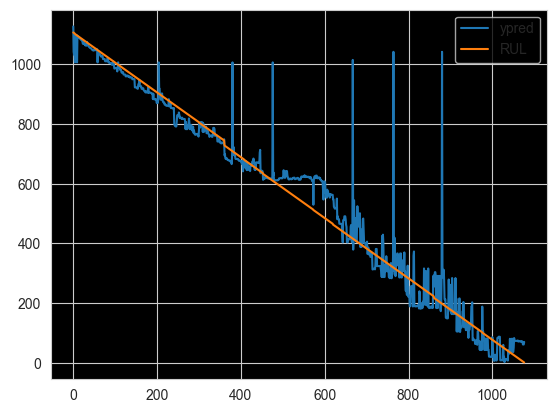


Mean Absolute Error      :  19.072702250798283
Mean Squared  Error      :  1147.0628831139104
Root Mean Squared  Error :  33.868316803672286
Accuracy on Training set   :  0.9997898183559859
Accuracy on Testing set  :  0.9887896576409174
Mean Absolute Error      :  43.163132384950245
Mean Squared  Error      :  5670.790551635864
Root Mean Squared  Error :  75.30465159361582
Accuracy on Testing set  :  0.9453271087695305


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



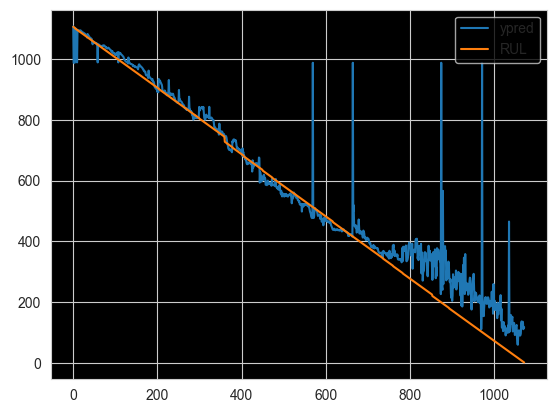


Mean Absolute Error      :  18.862262918386275
Mean Squared  Error      :  1061.598378029485
Root Mean Squared  Error :  32.58217884103954
Accuracy on Training set   :  0.9997609499635023
Accuracy on Testing set  :  0.9895903872195523
Mean Absolute Error      :  50.21325722273999
Mean Squared  Error      :  7828.090696854614
Root Mean Squared  Error :  88.47649799158313
Accuracy on Testing set  :  0.9242966176980525


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



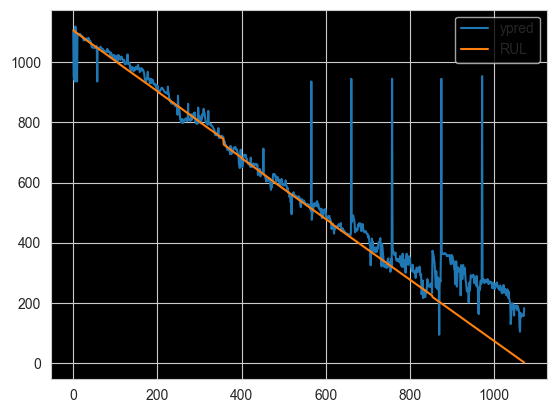


Mean Absolute Error      :  19.504951437168472
Mean Squared  Error      :  1170.6606733678716
Root Mean Squared  Error :  34.21491887127414
Accuracy on Training set   :  0.9997696929809085
Accuracy on Testing set  :  0.9882597692494125
Mean Absolute Error      :  40.1185672596754
Mean Squared  Error      :  4470.962244224693
Root Mean Squared  Error :  66.86525438689883
Accuracy on Testing set  :  0.9569201128164384


/Users/aradhnasingh/opt/anaconda3/envs/projectvenv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



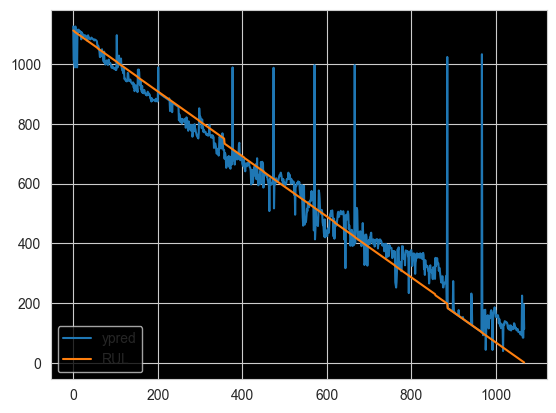

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor


for i in range(1,14):
    test=df[df['battery id']==i]
    dfx=df[df['battery id']!=i]
    df1=dfx[(dfx['Discharge Time (s)']<5000)]
    X = df1[['Discharge Time (s)','Max. Voltage Dischar. (V)']]
    y = df1["RUL"]
    """
    Train a Extra Tree regressor model on the input features X and target y.
    """
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Train the model on the training set
    #model = LinearRegression()
    model = ExtraTreesRegressor()

    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)


    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Training set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    y_pred=model.predict(test[['Discharge Time (s)','Max. Voltage Dischar. (V)']])
    test['ypred']=list(y_pred)
    test[['RUL','ypred']]
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(test['RUL'], y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(test['RUL'], y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(test['RUL'], y_pred)))
    print('Accuracy on Testing set  : ', model.score(test[['Discharge Time (s)','Max. Voltage Dischar. (V)']],test['RUL']))
    test.reset_index()[['ypred','RUL']].plot()
    plt.show()
    print("")